In [2]:
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.impute import SimpleImputer;
from sklearn.compose import ColumnTransformer;
from sklearn.pipeline import Pipeline;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression ;
from sklearn.linear_model import Ridge, Lasso;
from sklearn.metrics import mean_squared_error;
from sklearn.metrics import r2_score;
from sklearn.preprocessing import PolynomialFeatures;
from sklearn.svm import SVR;
from sklearn.svm import SVC;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.ensemble import RandomForestRegressor;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.naive_bayes import GaussianNB;
import pickle;

In [3]:
import pandas as pd;
data = pd.read_csv('../input/groceries-dataset/Groceries_dataset.csv');
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
data.shape

(38765, 3)

# Most Sold Items

In [22]:
data['itemDescription'].value_counts()[:10]

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

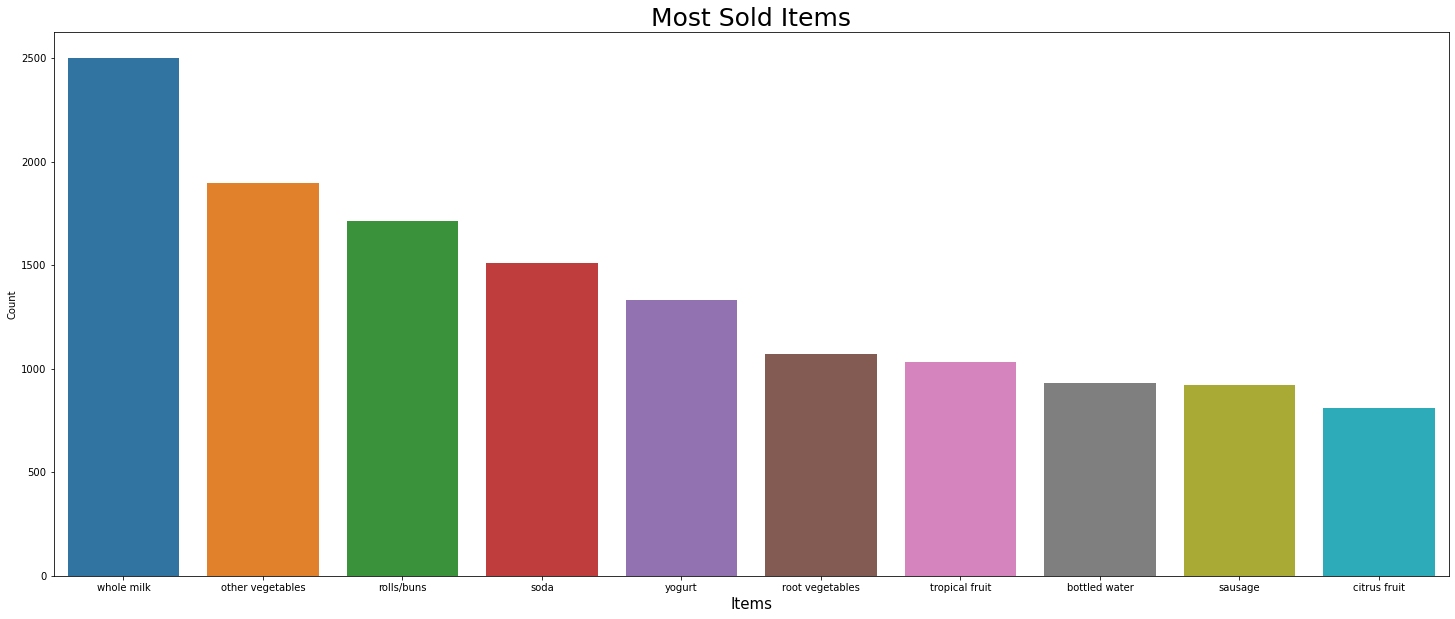

In [26]:
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='itemDescription',  data=data, order = ['whole milk', 'other vegetables', 'rolls/buns', 'soda','yogurt'
,'root vegetables','tropical fruit', 'bottled water', 'sausage', 'citrus fruit'] );
plt.title("Most Sold Items", fontsize = 25)
plt.xlabel("Items", fontsize = 15)
plt.ylabel("Count")

plt.show()

# Least Sold Items

In [54]:
data['itemDescription'].value_counts().nsmallest(10)

kitchen utensil          1
preservation products    1
baby cosmetics           3
bags                     4
frozen chicken           5
rubbing alcohol          5
toilet cleaner           5
make up remover          5
salad dressing           6
whisky                   8
Name: itemDescription, dtype: int64

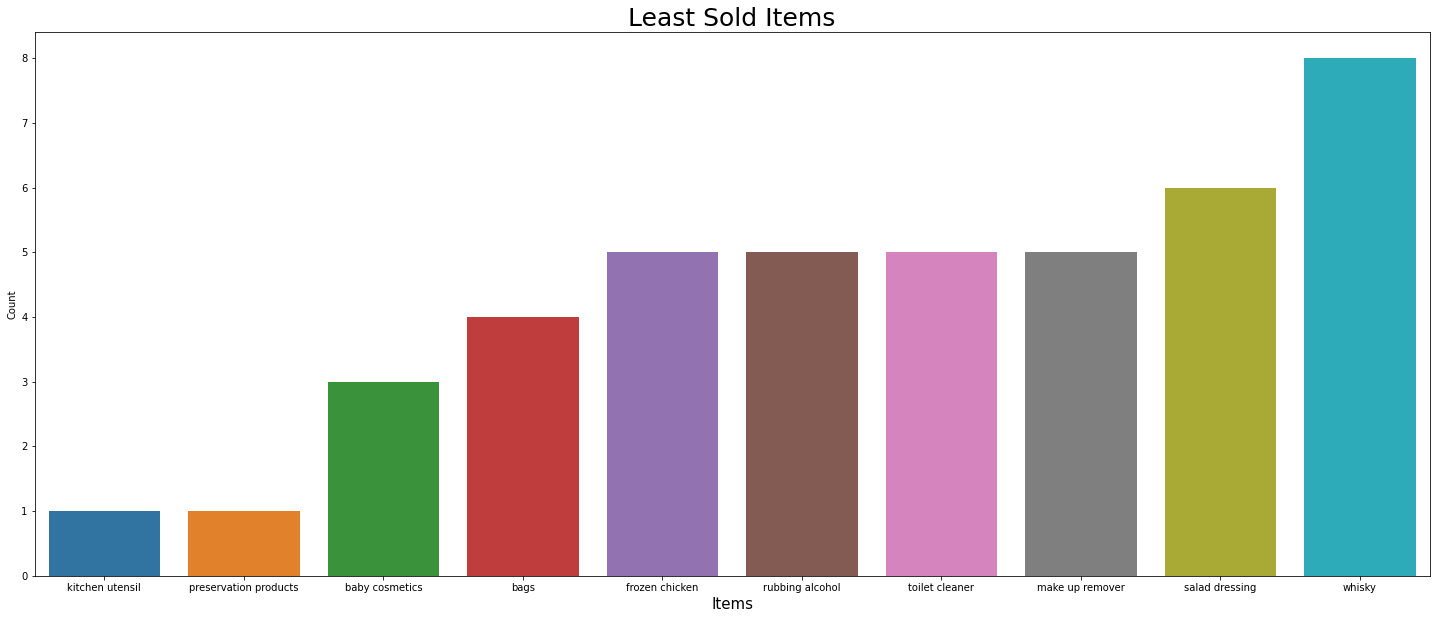

In [55]:
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='itemDescription',  data=data, order = ['kitchen utensil', 'preservation products', 'baby cosmetics', 'bags','frozen chicken'
,'rubbing alcohol','toilet cleaner', 'make up remover', 'salad dressing', 'whisky'] );
plt.title("Least Sold Items", fontsize = 25)
plt.xlabel("Items", fontsize = 15)
plt.ylabel("Count")

plt.show()

# Processing the Date Column

In [28]:
data['Date'] = pd.to_datetime(data['Date'])

In [29]:
data['year']= data['Date'].dt.year
data['month']= data['Date'].dt.month
data['day']= data['Date'].dt.day

# Sales on Different Months

In [30]:
data.head()

,Member_number,Date,itemDescription,year,month,day
0,1808,2015-07-21,tropical fruit,2015,7,21
1,2552,2015-05-01,whole milk,2015,5,1
2,2300,2015-09-19,pip fruit,2015,9,19
3,1187,2015-12-12,other vegetables,2015,12,12
4,3037,2015-01-02,whole milk,2015,1,2


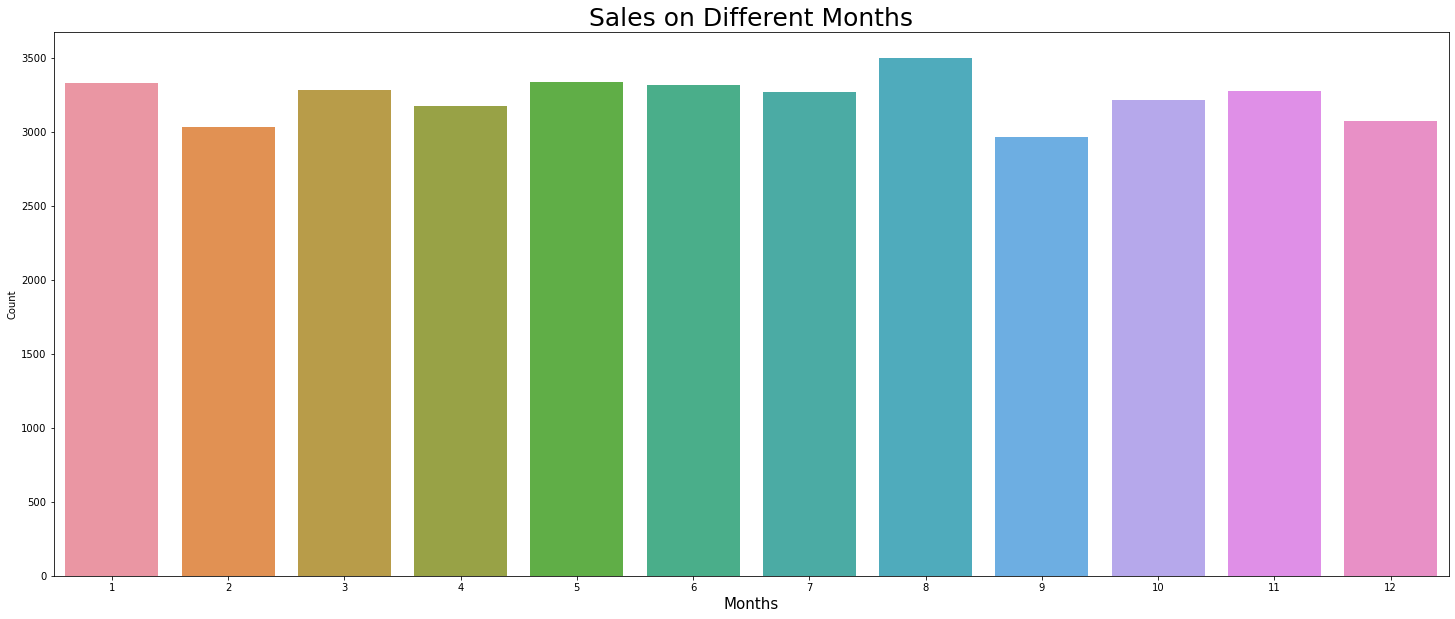

In [31]:
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='month',  data=data );
plt.title("Sales on Different Months", fontsize = 25)
plt.xlabel("Months", fontsize = 15)
plt.ylabel("Count")

plt.show()

# Days with Most Sales

In [32]:
data['day'].value_counts()[:10]

28    1375
21    1354
26    1351
8     1349
13    1341
14    1341
27    1327
10    1308
4     1308
11    1297
Name: day, dtype: int64

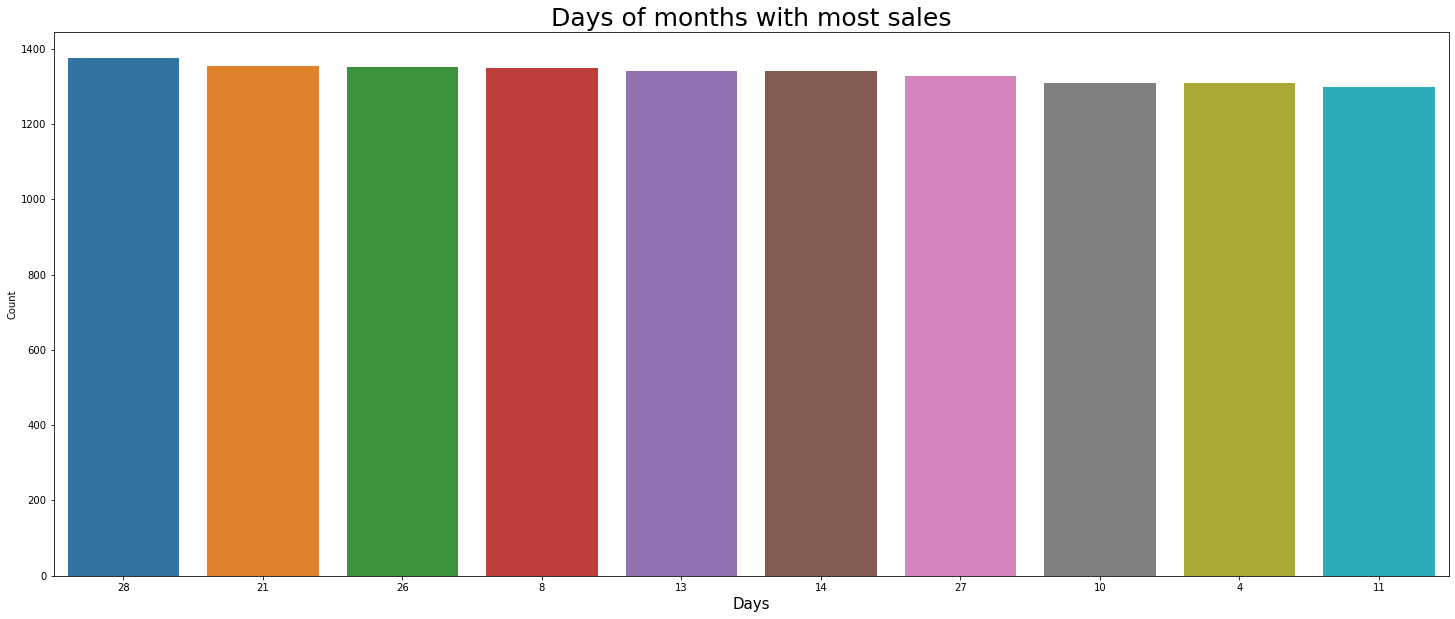

In [35]:
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='day',  data=data, order = [28, 21, 26,8,13,14,27,10,4,11] );
plt.title("Days of months with most sales", fontsize = 25)
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Count")

plt.show()

# Days with Least Sales

In [56]:
data['day'].value_counts().nsmallest(10)

31     672
29    1124
16    1158
12    1179
17    1181
30    1201
20    1214
25    1229
6     1232
3     1243
Name: day, dtype: int64

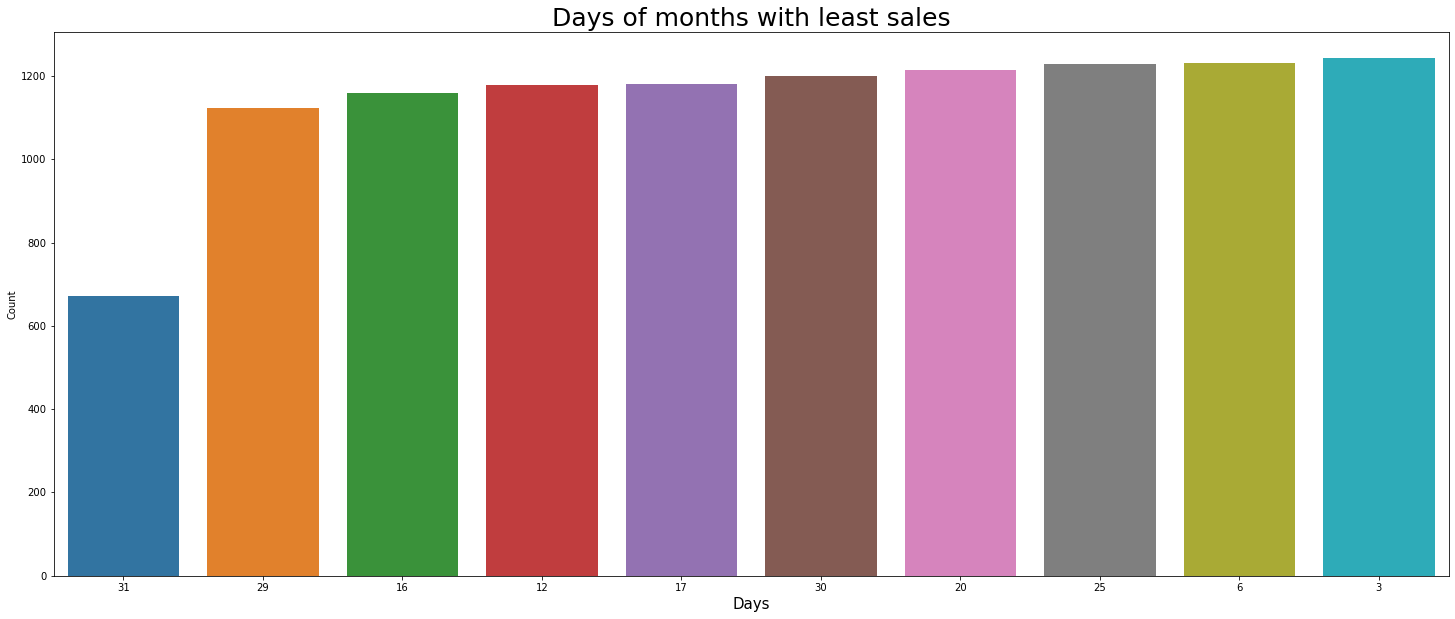

In [57]:
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='day',  data=data, order = [31,29,16,12,17,30,20,25,6,3] );
plt.title("Days of months with least sales", fontsize = 25)
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Count")

plt.show()

# Dates with MosT Sales

In [34]:
data['Date'].value_counts()[:10]

2015-01-21    96
2015-07-21    93
2015-11-29    92
2015-08-08    92
2015-04-30    91
2015-03-26    88
2014-08-28    88
2015-09-30    87
2015-06-19    85
2015-05-16    85
Name: Date, dtype: int64

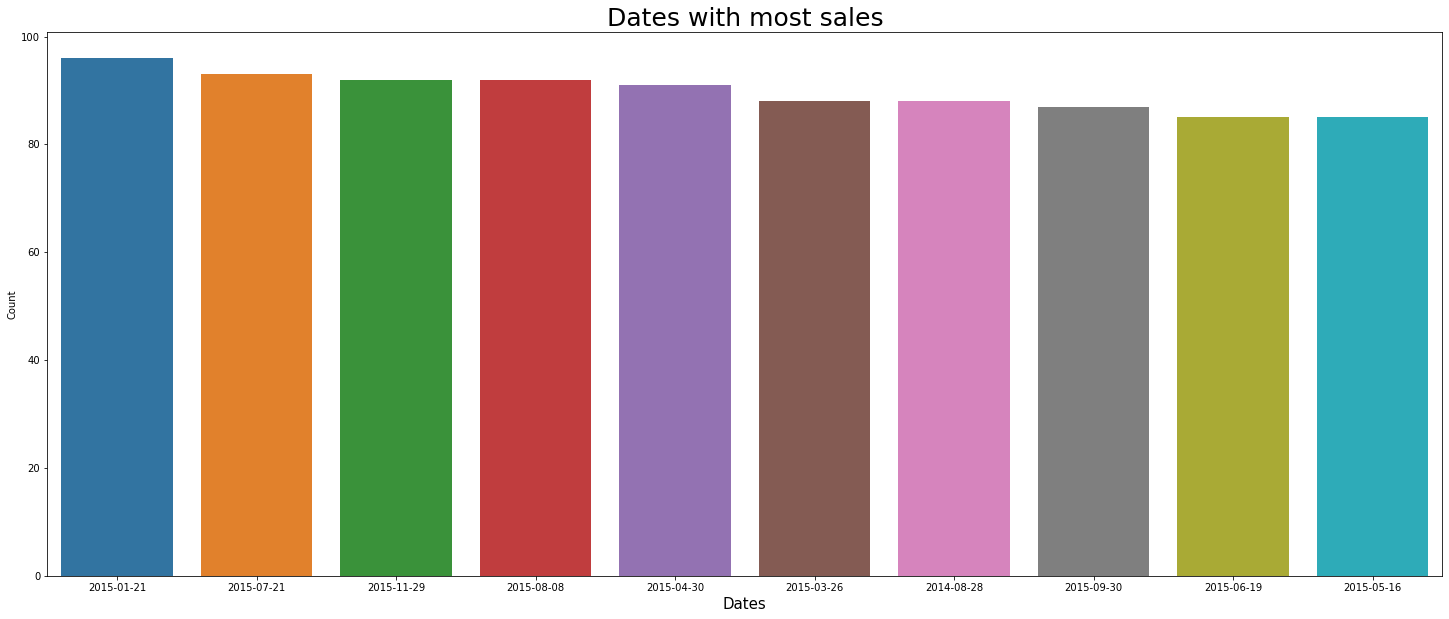

In [37]:
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='Date',  data=data, order = ['2015-01-21', '2015-07-21', '2015-11-29', '2015-08-08', '2015-04-30','2015-03-26',
'2014-08-28', '2015-09-30', '2015-06-19','2015-05-16'] );
plt.title("Dates with most sales", fontsize = 25)
plt.xlabel("Dates", fontsize = 15)
plt.ylabel("Count")

plt.show()

# Dates with Least Sales

In [58]:
data['Date'].value_counts().nsmallest(10)

2015-01-09    22
2015-03-17    23
2015-03-16    23
2014-04-07    24
2014-10-01    26
2014-09-15    26
2014-06-29    26
2014-01-15    28
2014-06-11    28
2014-07-12    28
Name: Date, dtype: int64

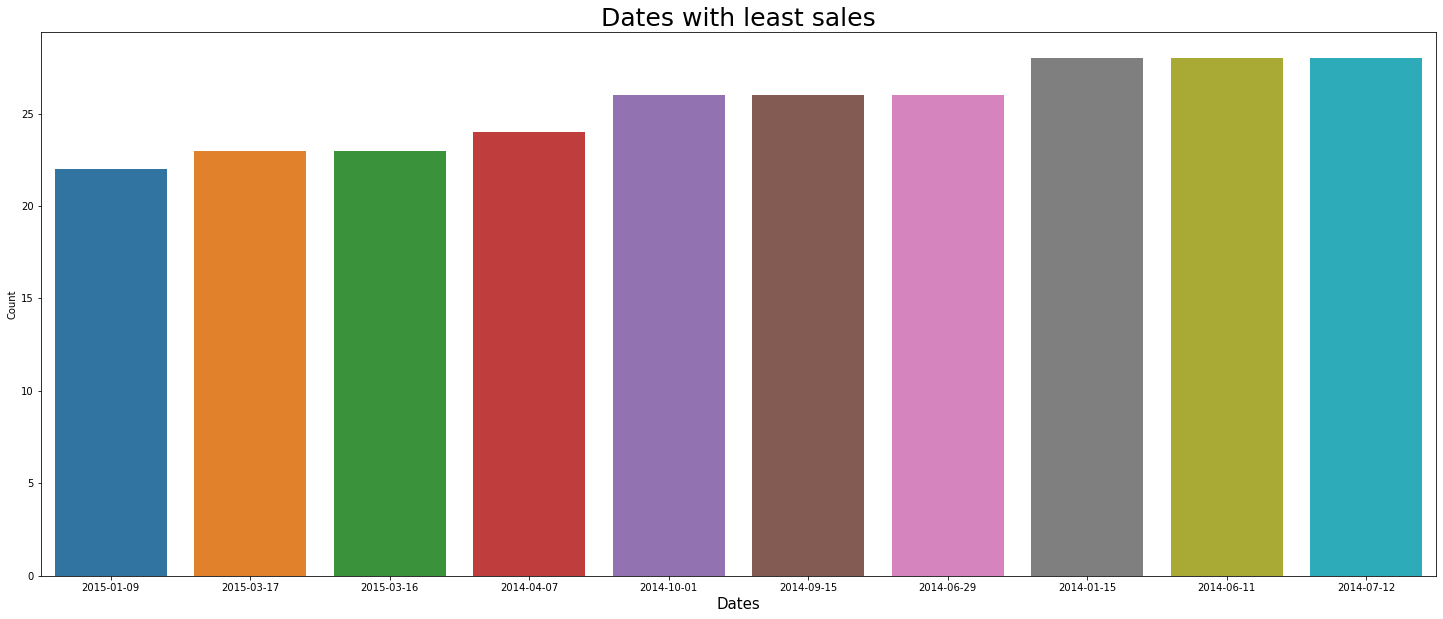

In [59]:
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='Date',  data=data, order = ['2015-01-09', '2015-03-17', '2015-03-16', '2014-04-07', '2014-10-01','2014-09-15',
'2014-06-29', '2014-01-15', '2014-06-11','2014-07-12'] );
plt.title("Dates with least sales", fontsize = 25)
plt.xlabel("Dates", fontsize = 15)
plt.ylabel("Count")

plt.show()

# Sales on Different Years

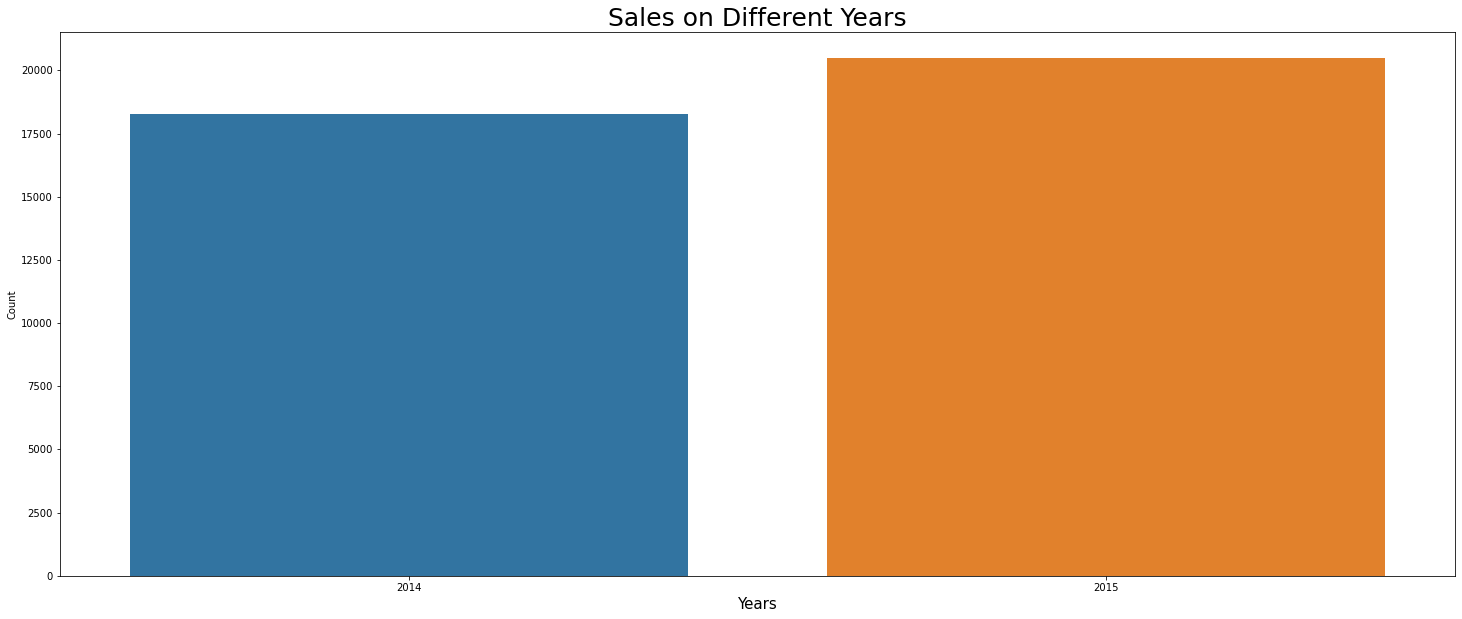

In [60]:
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='year',  data=data, );
plt.title("Sales on Different Years", fontsize = 25)
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Count")

plt.show()